In [7]:
# imports
import json
import scipy
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
plots_folder = './plots/'
backtest_file = './data/Determined Light Brown Wolf.json'

In [9]:
# read in json
with open(backtest_file, 'r') as json_file:
    data = json.load(json_file)

In [10]:
pprint.pprint(list(data.keys()))

['RollingWindow',
 'TotalPerformance',
 'Charts',
 'Orders',
 'ProfitLoss',
 'Statistics',
 'RuntimeStatistics',
 'State',
 'AlgorithmConfiguration']


In [11]:
pprint.pprint(list(data['Charts']['Strategy Equity']['Series']['Daily Performance']['Values'])[9900:10000])

[{'x': 1578546000, 'y': 0.9158333},
 {'x': 1578632400, 'y': -0.1360063},
 {'x': 1578718800, 'y': 0.06910594},
 {'x': 1578805200, 'y': 0.0},
 {'x': 1578891600, 'y': 0.0},
 {'x': 1578978000, 'y': 1.594214},
 {'x': 1579064400, 'y': -0.2735171},
 {'x': 1579150800, 'y': 0.6198821},
 {'x': 1579237200, 'y': 0.9097619},
 {'x': 1579323600, 'y': -0.2170445},
 {'x': 1579410000, 'y': 0.0},
 {'x': 1579496400, 'y': 0.0},
 {'x': 1579582800, 'y': 0.0},
 {'x': 1579669200, 'y': -0.7087328},
 {'x': 1579755600, 'y': 0.6549442},
 {'x': 1579842000, 'y': -0.575572},
 {'x': 1579928400, 'y': -0.9780155},
 {'x': 1580014800, 'y': 0.0},
 {'x': 1580101200, 'y': 0.0},
 {'x': 1580187600, 'y': -1.256045},
 {'x': 1580274000, 'y': 0.7008552},
 {'x': 1580360400, 'y': -0.2186978},
 {'x': 1580446800, 'y': 0.5384474},
 {'x': 1580533200, 'y': -1.272974},
 {'x': 1580619600, 'y': 0.0},
 {'x': 1580706000, 'y': 0.0},
 {'x': 1580792400, 'y': 0.4927795},
 {'x': 1580878800, 'y': 0.853975},
 {'x': 1580965200, 'y': 1.464586},
 {'x':

In [12]:
pprint.pprint(list(data['RuntimeStatistics']['Probabilistic Sharpe Ratio']['']))

TypeError: string indices must be integers

In [13]:
pprint.pprint(list(data['Charts'].keys()))

['Exposure',
 'Drawdown',
 'Assets Sales Volume',
 'Portfolio Turnover',
 'Strategy Equity',
 'Capacity',
 'Benchmark']


In [14]:
long_exposure = data['Charts']['Exposure']['Series']['Equity - Long Ratio']['Values']
short_exposure = data['Charts']['Exposure']['Series']['Equity - Short Ratio']['Values']
drawdown = data['Charts']['Drawdown']['Series']['Equity Drawdown']['Values']

asset_sales_vol = data['Charts']['Assets Sales Volume']['Series']['AAL']['Values'] ## has all the assets


portfolio_turnover = data['Charts']['Portfolio Turnover']['Series']['Portfolio Turnover']['Values']
daily_performance = data['Charts']['Strategy Equity']['Series']['Daily Performance']['Values']
capacity = data['Charts']['Capacity']['Series']['Strategy Capacity']['Values']
benchmark = data['Charts']['Benchmark']['Series']['Benchmark']['Values']


In [15]:
def data_variations(data):
    filtered = list(filter(lambda x: x['y'] != 0, data))
    positive = list(filter(lambda x: x['y'] > 0, data))
    negative = list(filter(lambda x: x['y'] < 0, data))

    return data, filtered, positive, negative

In [16]:
long_exp = data_variations(long_exposure)[1]
short_exp = data_variations(short_exposure)[1]
drawd = data_variations(drawdown)[1]

# asset_sales_vol = data_variations(short_exposure)[1]

portf_turno = data_variations(portfolio_turnover)[1]
daily_perf = data_variations(daily_performance)[1]
capac = data_variations(capacity)[1]
bench = data_variations(benchmark)[1]

In [17]:
def plot_data(data, feature_name, save=''):
    df = pd.DataFrame(data)

    # Create a scatter plot using Seaborn and Matplotlib
    
    g = sns.regplot(data=df, x = 'x', y = 'y',
        scatter_kws = {"color": "black", "alpha": 0.5},
        line_kws = {"color": "red"},
        ci = 95
    ) # 95% level
    # g.set_ylim(-0.3, 0.3)

    #calculate slope and intercept of regression equation
    slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),
                                                        y=g.get_lines()[0].get_ydata())

    #display slope and intercept of regression equation
    #add regression equation to plot
    plt.legend(labels=[f'{feature_name} = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x'])

    # Set labels and title
    plt.xlabel('X Values')
    plt.ylabel(f'{feature_name} Values')
    plt.title(f'Scatter Plot of X vs {feature_name}')

    if save:
        plt.savefig(plots_folder + save)

    # Show the plot
    plt.show()

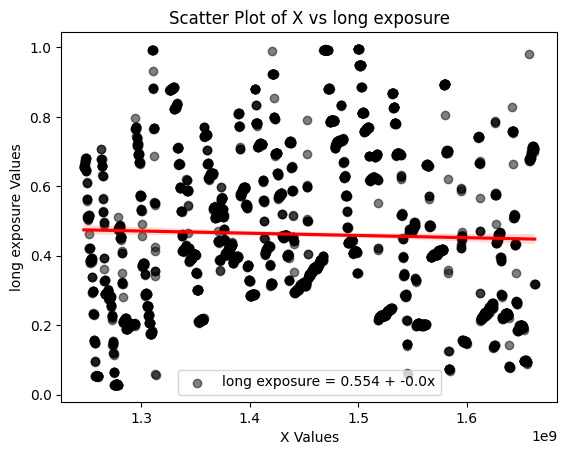

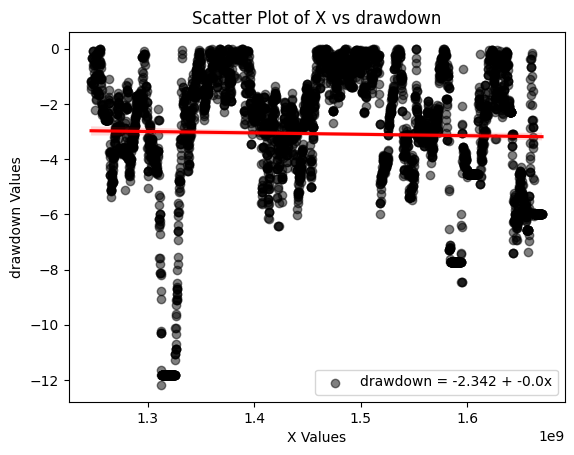

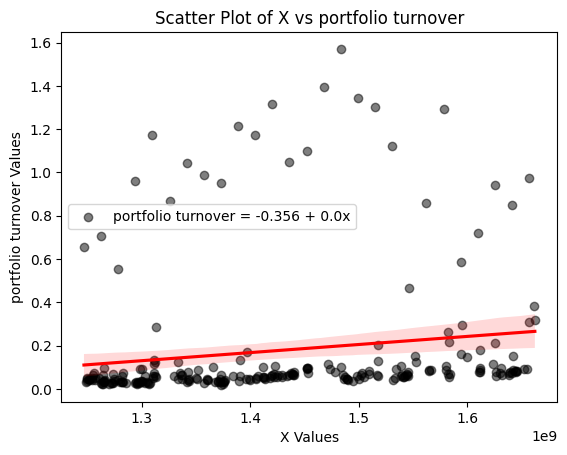

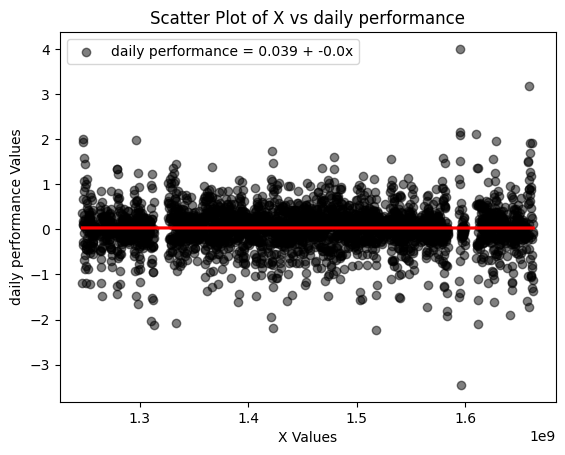

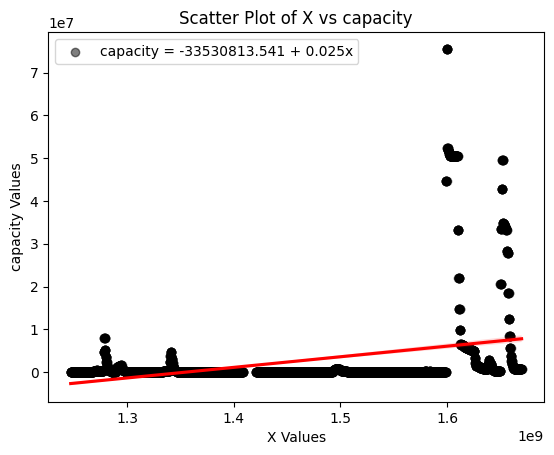

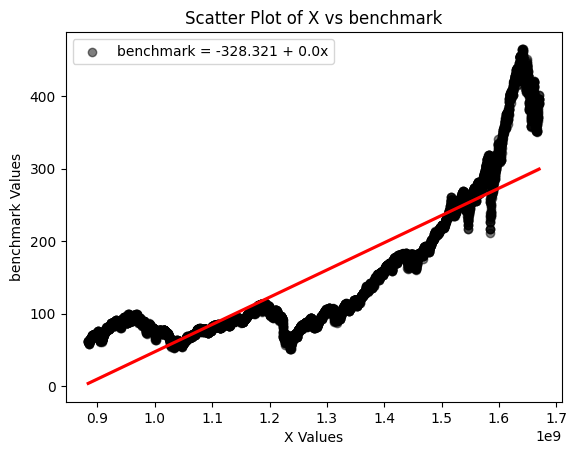

In [127]:
plot_data(long_exp, 'long exposure')
# plot_data(short_exp) # empty since its all zeros
plot_data(drawd, 'drawdown')
# plot_data(asset_sales_vol) # empty since its all zeros
plot_data(portf_turno, 'portfolio turnover')
plot_data(daily_perf, 'daily performance')
plot_data(capac, 'capacity')
plot_data(bench, 'benchmark')

In [22]:
def plot_line(data, feature_name, save='', line=True):

    x_data = [e['x'] for e in data]
    y_data = [e['y'] for e in data]

    chunk_size = 3
    x_avg = []
    y_avg = []

    for i in range(0, len(data), chunk_size):
        x_chunk = x_data[i:i+chunk_size]
        y_chunk = y_data[i:i+chunk_size]
        x_average = sum(x_chunk) / chunk_size
        y_average = sum(y_chunk) / chunk_size
        x_avg.append(x_average)
        y_avg.append(y_average)

    # x = np.linspace(min(x_data), max(x_data), 100)

    sns.set(style="darkgrid")

    sns.lineplot(x=x_data, y=y_data)
    # sns.scatterplot(x=x_data, y=y_data, lowess=True, label="Smoothed line")
    sns.lmplot(x='x', y='y', data=pd.DataFrame({'x': x_data, 'y': y_data}), ci=0.95, order=1, truncate=False, scatter=True, scatter_kws=dict(alpha=0.3), x_bins=200) # x_bins=150


    plt.title("Plot")
    plt.xlabel(f"Time scale")
    plt.ylabel(f"{feature_name}")

    if save:
        plt.savefig(plots_folder + save)

    plt.show()


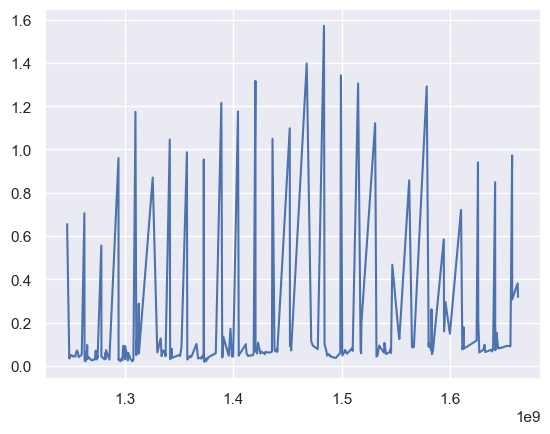

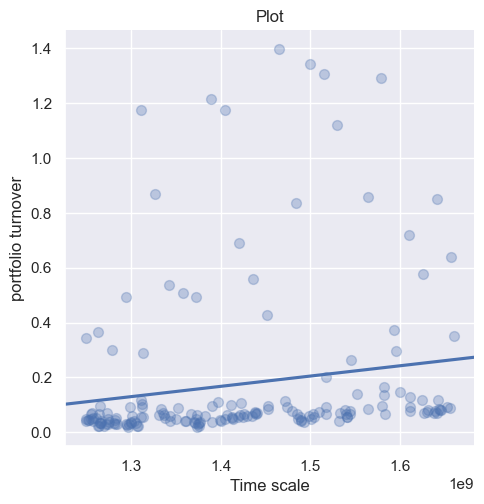

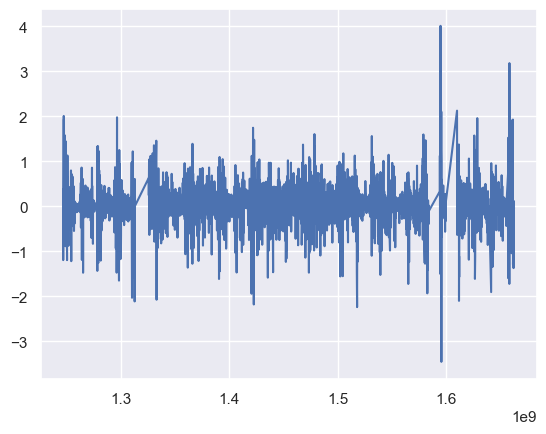

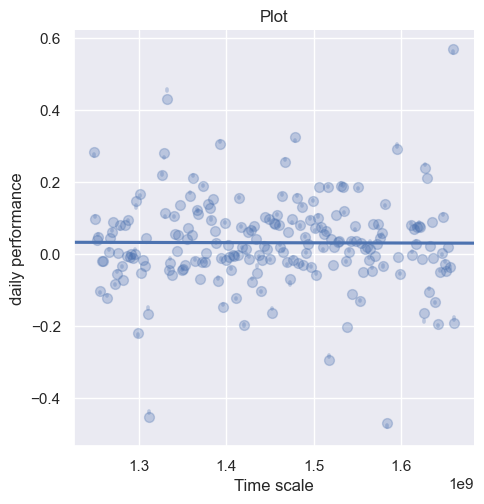

In [23]:
# plot_line(long_exp, 'long exposure')
# plot_data(short_exp) # empty since its all zeros
# plot_line(drawd, 'drawdown')
# plot_data(asset_sales_vol) # empty since its all zeros
plot_line(portf_turno, 'portfolio turnover')
plot_line(daily_perf, 'daily performance')
# plot_line(capac, 'capacity')
# plot_line(bench, 'benchmark')

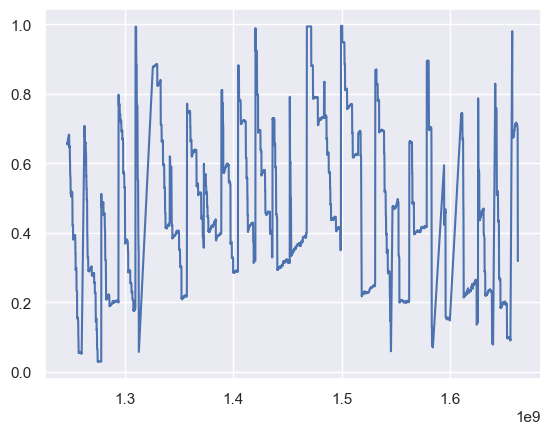

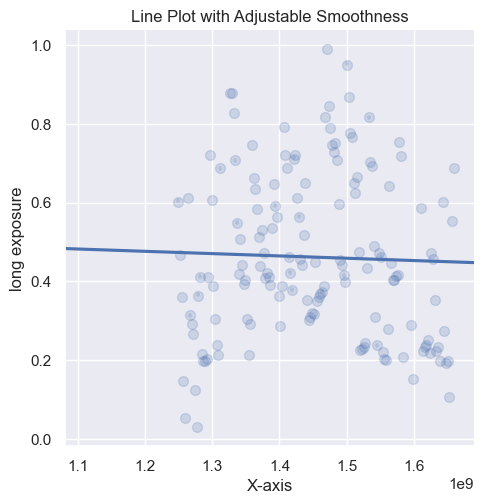

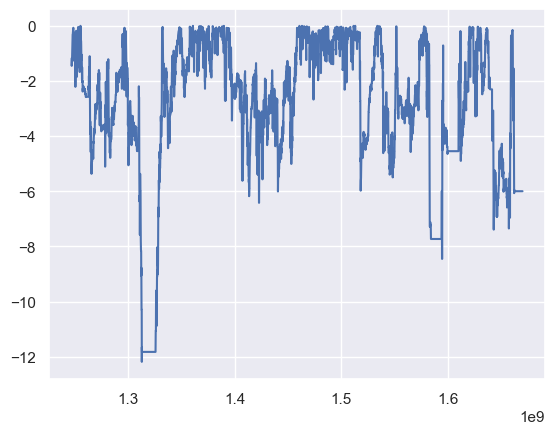

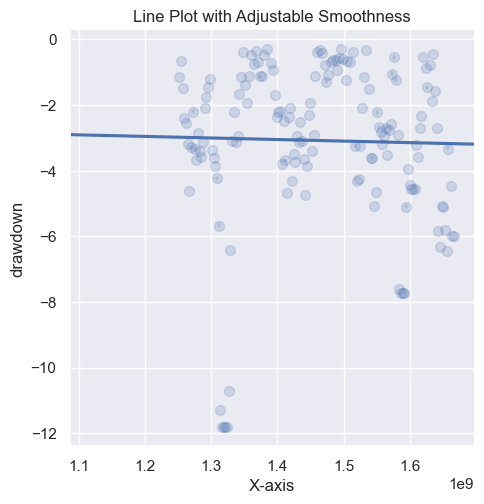

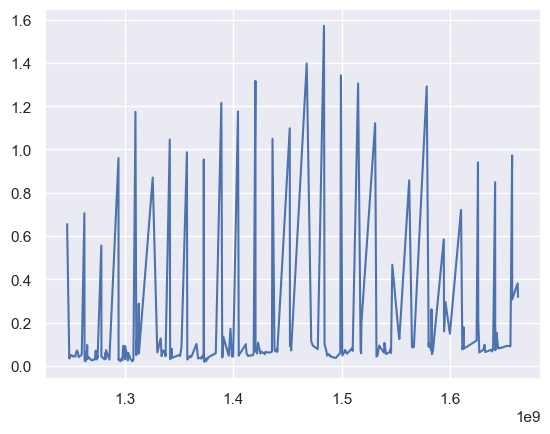

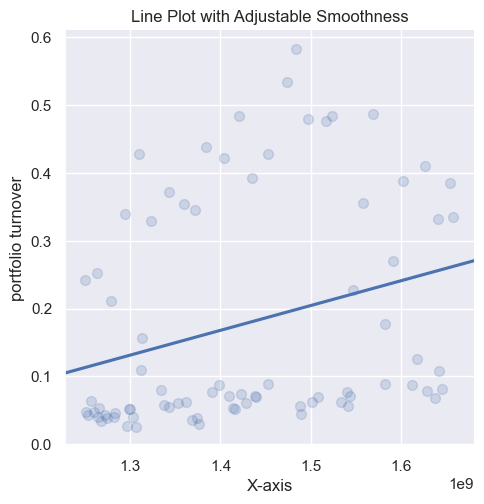

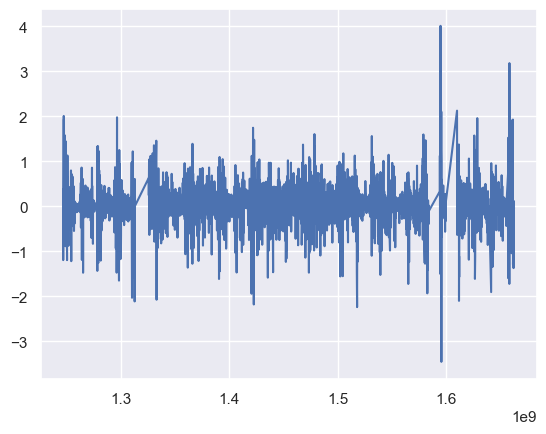

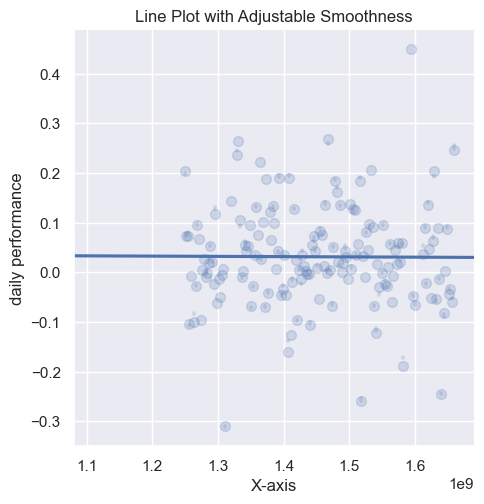

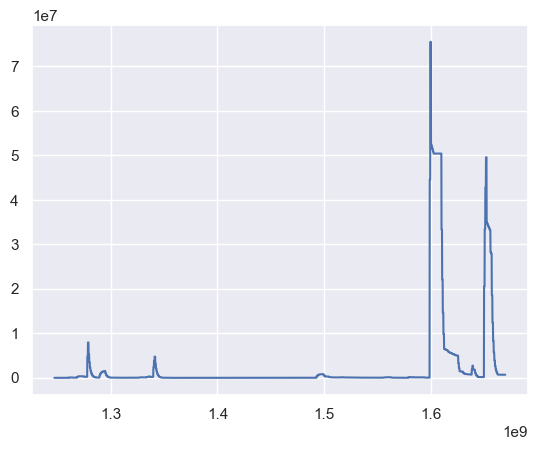

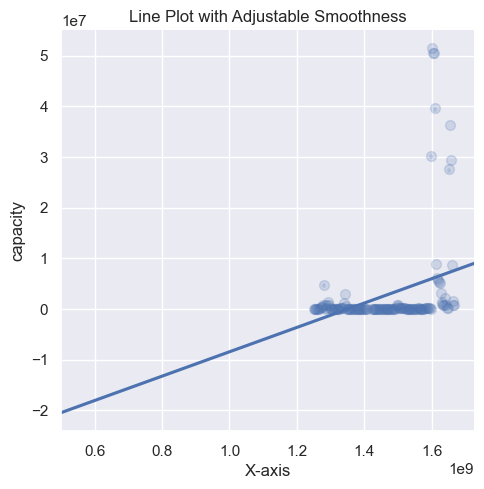

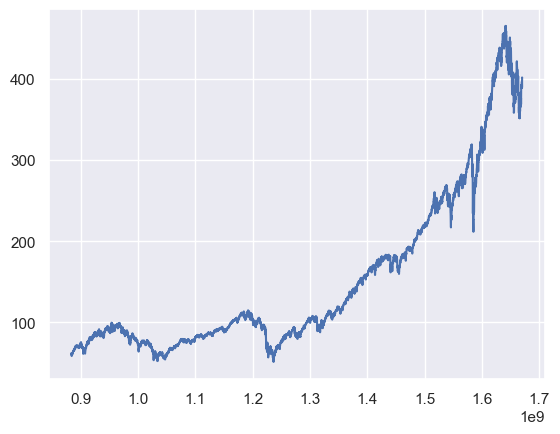

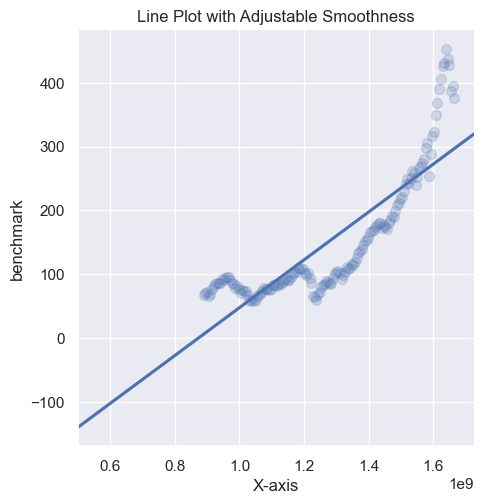

In [222]:
plot_line(long_exp, 'long exposure')
# plot_data(short_exp) # empty since its all zeros
plot_line(drawd, 'drawdown')
# plot_data(asset_sales_vol) # empty since its all zeros
plot_line(portf_turno, 'portfolio turnover')
plot_line(daily_perf, 'daily performance')
plot_line(capac, 'capacity')
plot_line(bench, 'benchmark')

## Assets

In [204]:
assets = [x for x in data['Charts']['Assets Sales Volume']['Series']]

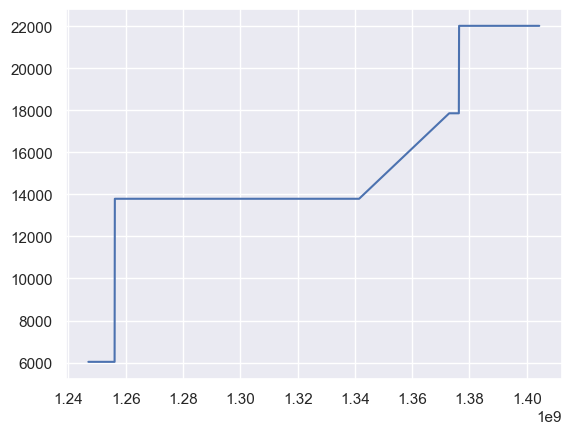

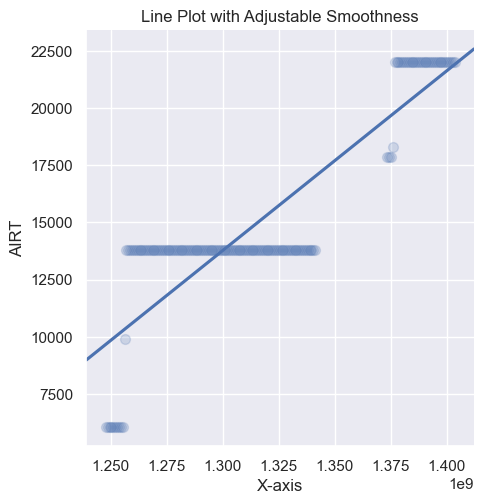

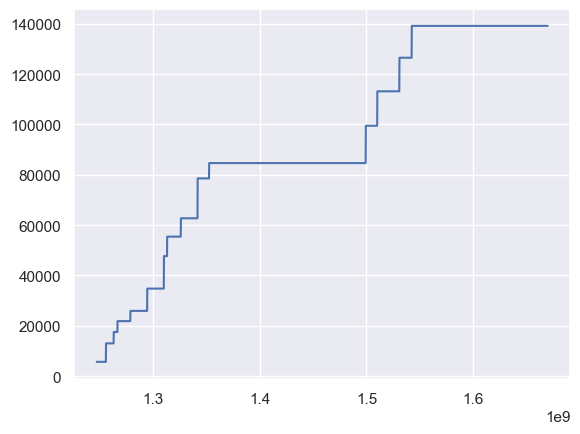

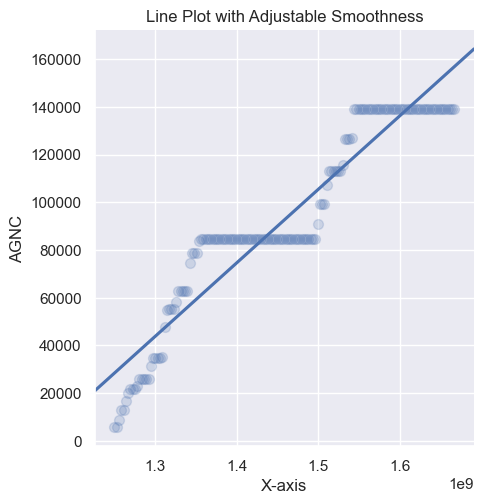

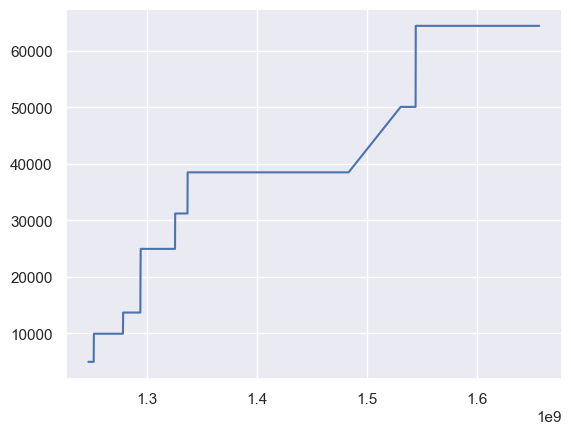

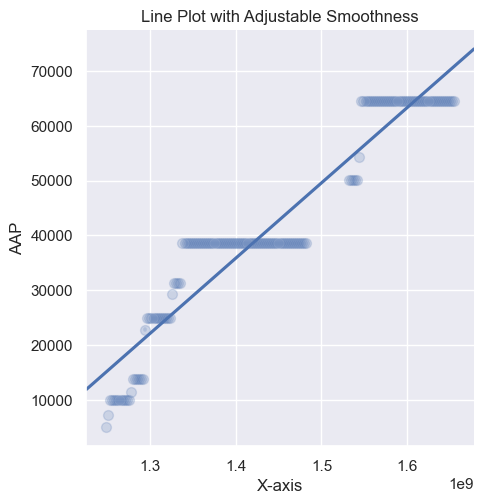

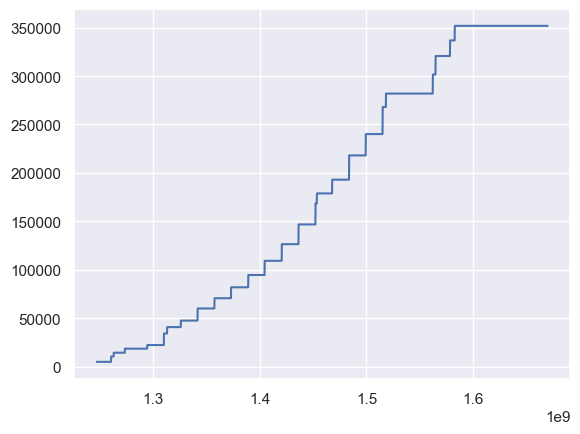

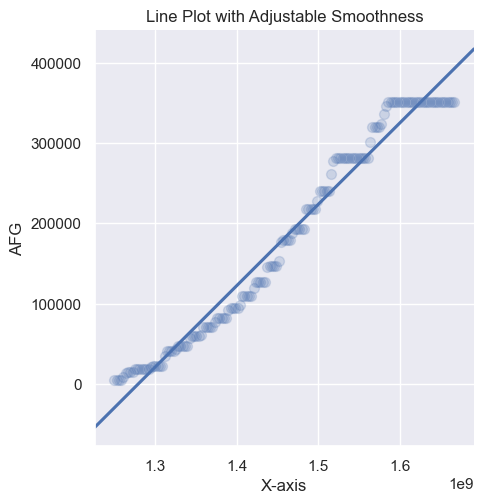

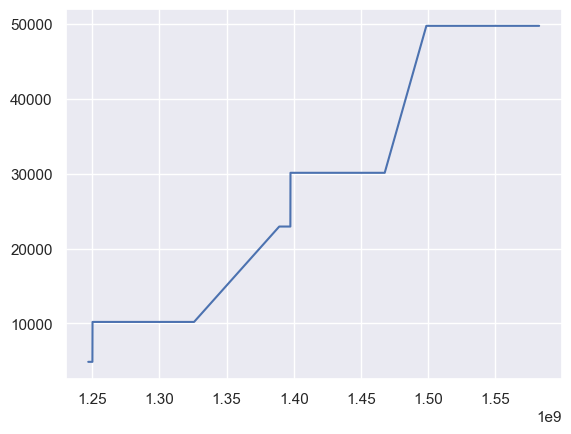

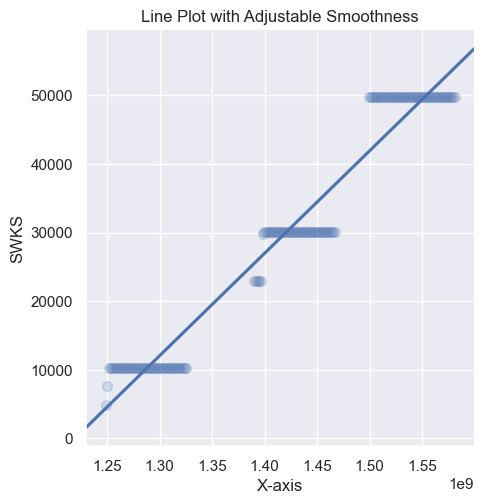

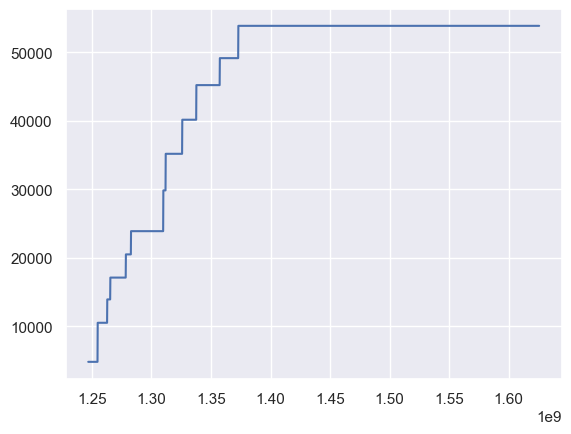

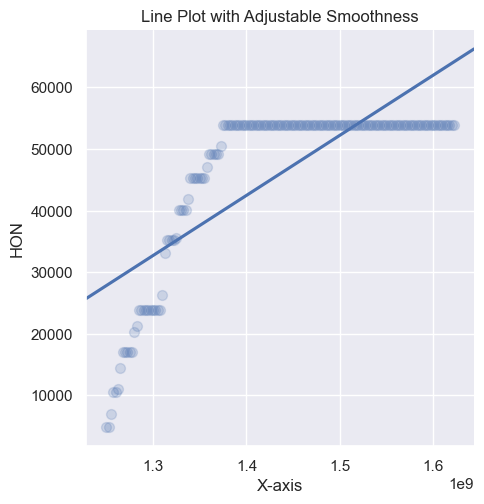

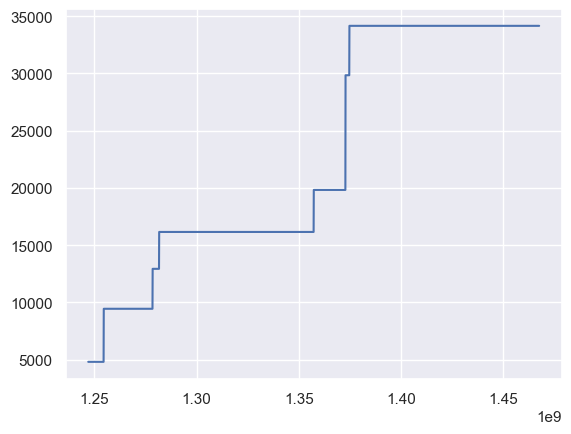

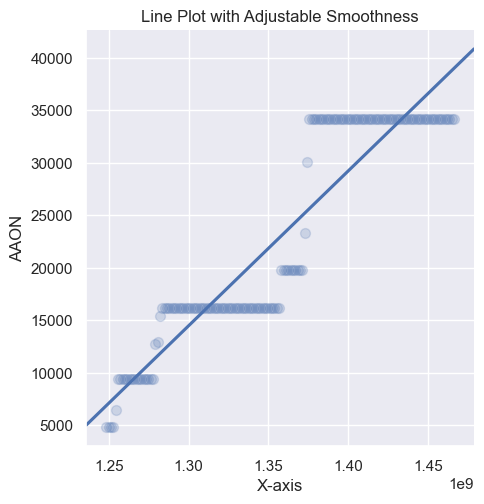

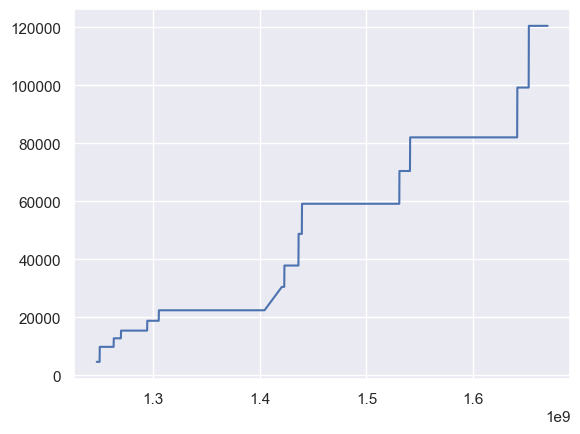

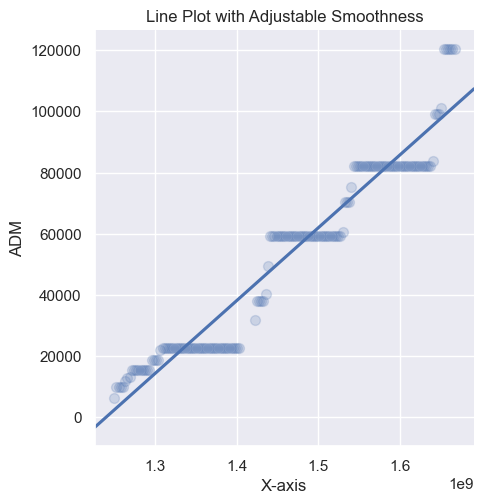

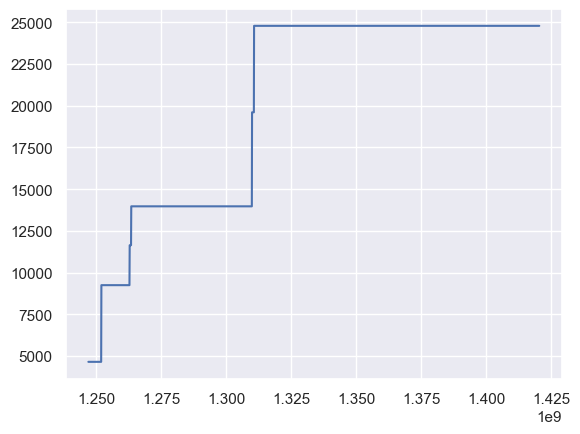

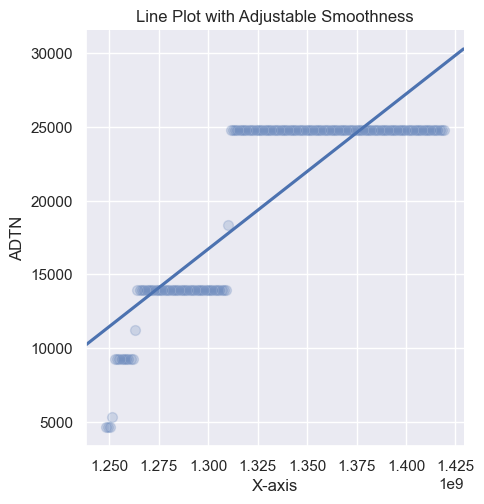

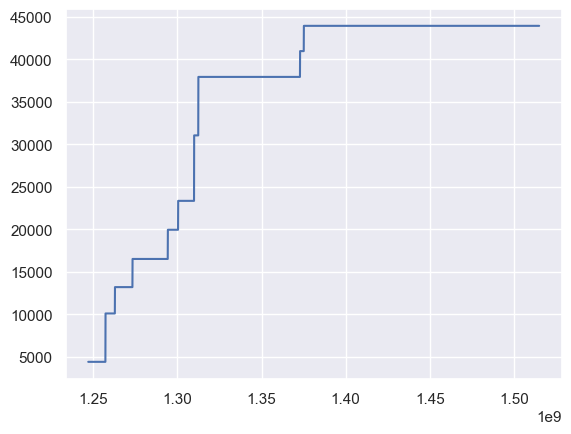

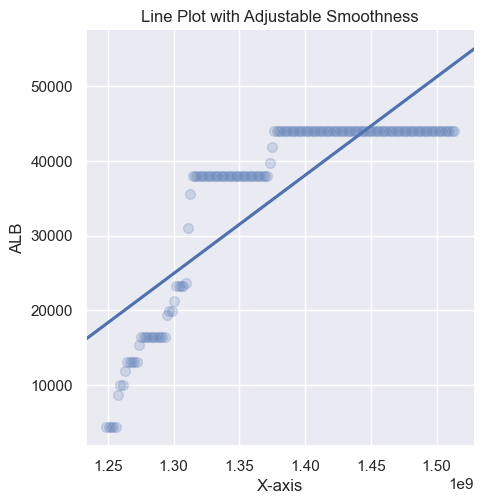

In [226]:
for asset in assets[:10]:
    plot_line(data['Charts']['Assets Sales Volume']['Series'][asset]['Values'], asset)